In [1]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.models.model_library import QED_DFSZ, beta
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [2]:
ma = np.logspace(np.log10(0.103), np.log10(5.0), 50)
fa = np.logspace(3, 7, 50)
couplings = [QED_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(5.1, 'VA_below', 'leadinglog') for f in fa]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [3]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
]

In [11]:
chi2_dark = get_chi2(['B+ -> K+ a', 'B0 -> K*0 a'], x_ma, y_couplings, y_fa, br_dark = 1e-3, integrator='no_rge')

In [27]:
chi2 = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 0.0, integrator='no_rge')

In [ ]:
for obs in chi2.keys():
    print(obs)

('B+ -> K+ a', 'Belle II')
('B0 -> K*0 a', 'BaBar')
('B+ -> K+ e e', 'Belle II')
('B0 -> K*0 e e', 'Belle II')
('B+ -> K+ mu mu', 'LHCb')
('B+ -> K+ mu mu', 'Belle II')
('B+ -> K+ mu mu', 'CHARM')
('B0 -> K*0 mu mu', 'LHCb')
('B0 -> K*0 mu mu', 'Belle II')
('', 'Global')


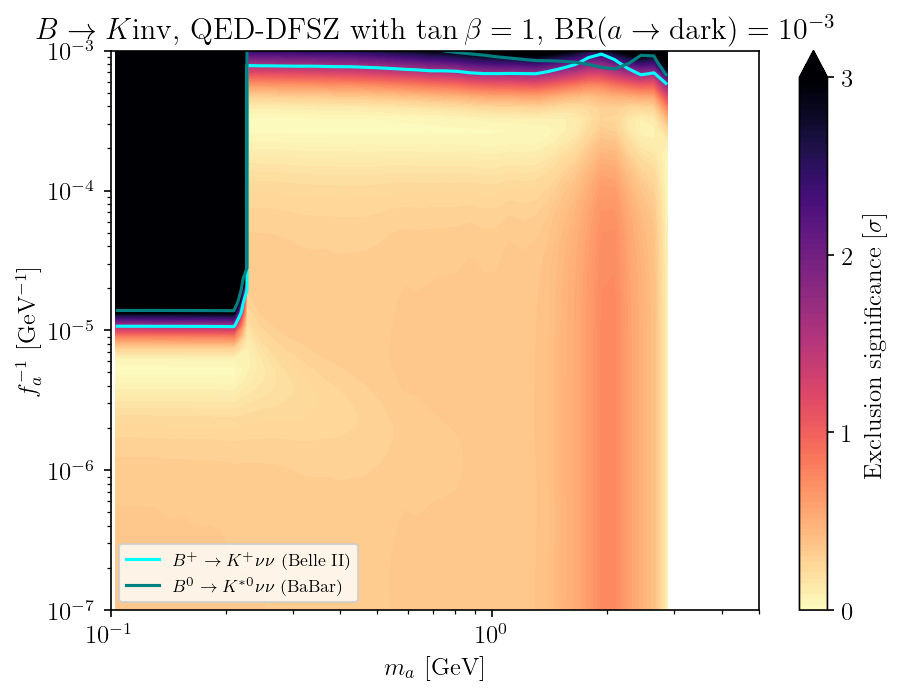

In [12]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K \mathrm{inv}$, QED-DFSZ with $\tan\beta = 1$, $\mathrm{BR}(a\to \mathrm{dark}) = 10^{-3}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()
#plt.savefig('bka.pdf', dpi=1000)

In [25]:
chi2_dark = get_chi2(['B+ -> K+ a', 'B0 -> K*0 a'], x_ma, y_couplings, y_fa, br_dark = 0.99, integrator='no_rge')

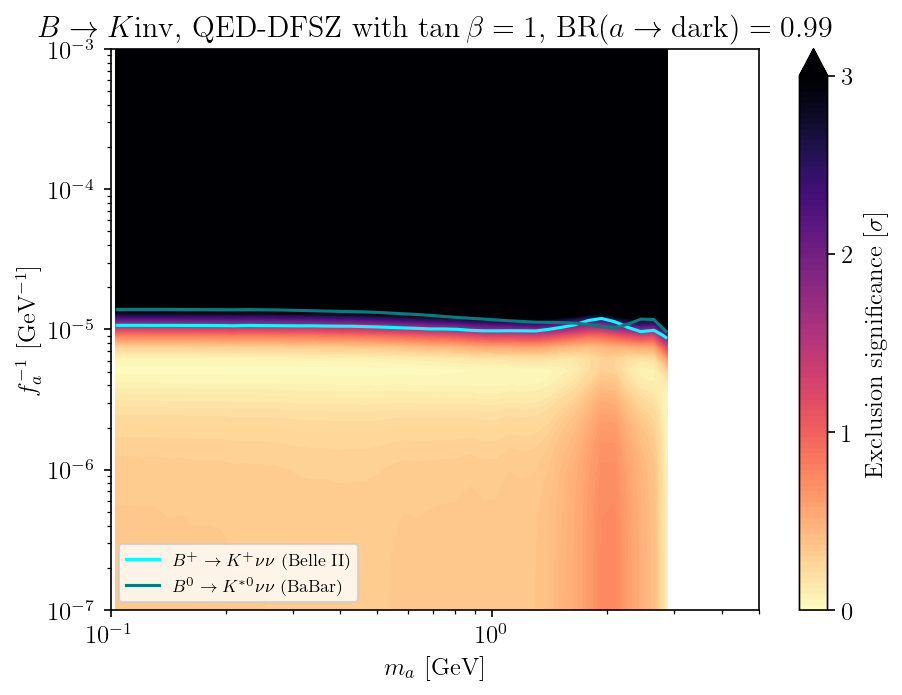

In [26]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K \mathrm{inv}$, QED-DFSZ with $\tan\beta = 1$, $\mathrm{BR}(a\to \mathrm{dark}) = 0.99$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

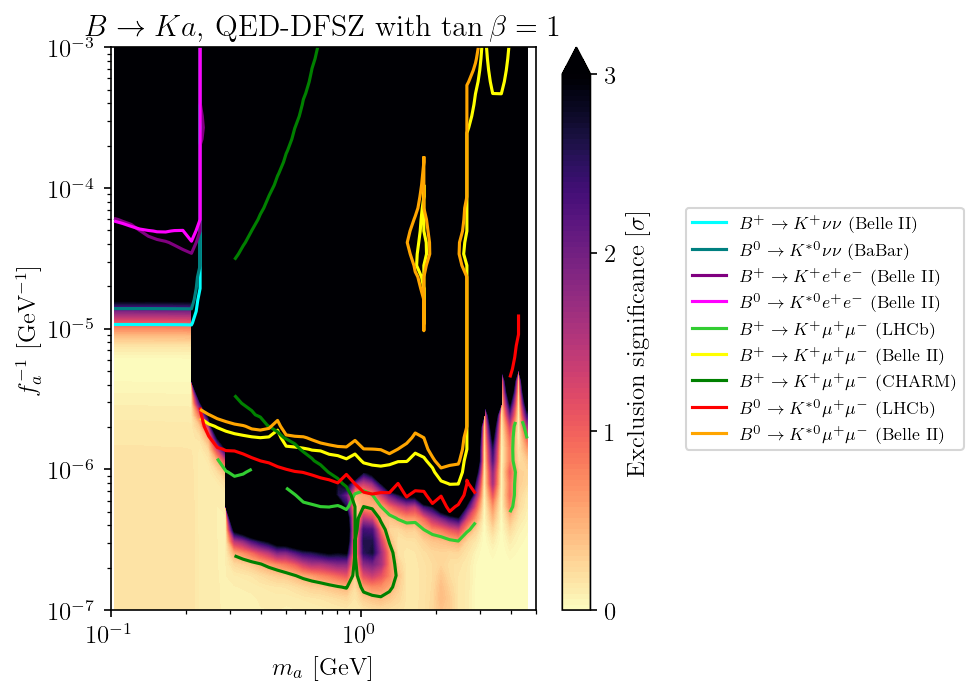

In [28]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.tight_layout()

In [4]:
ma = 2.0
br_dark = np.logspace(-5, 0.0, 50)
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_fa = np.meshgrid(br_dark, fa)

In [5]:
chi2_dark = get_chi2(['B+ -> K+ a', 'B0 -> K*0 a'], ma, y_couplings, y_fa, br_dark = x_br_dark, integrator='no_rge')

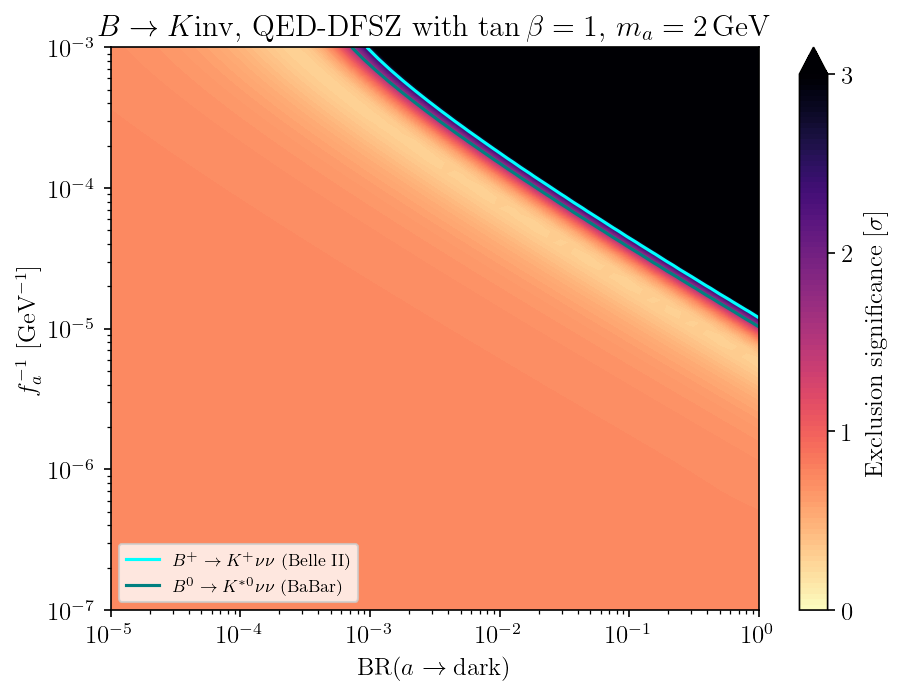

In [9]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_br_dark, 1/y_fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_br_dark, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$\mathrm{BR}(a\to \mathrm{dark})$')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, QED-DFSZ with $\tan\beta = 1$, $m_a = 2\,\mathrm{GeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

In [10]:
from alpaca import ALPcouplings

In [14]:
fa = 1000
couplings = [ALPcouplings({'cuR': np.diag([0, 0, cuR])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cuR in np.logspace(-4, 0, 50)]
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_cuR = np.meshgrid(br_dark, np.logspace(-4, 0, 50))

In [15]:
chi2_dark = get_chi2(['B+ -> K+ a', 'B0 -> K*0 a'], ma, y_couplings, fa, br_dark = x_br_dark, integrator='no_rge')

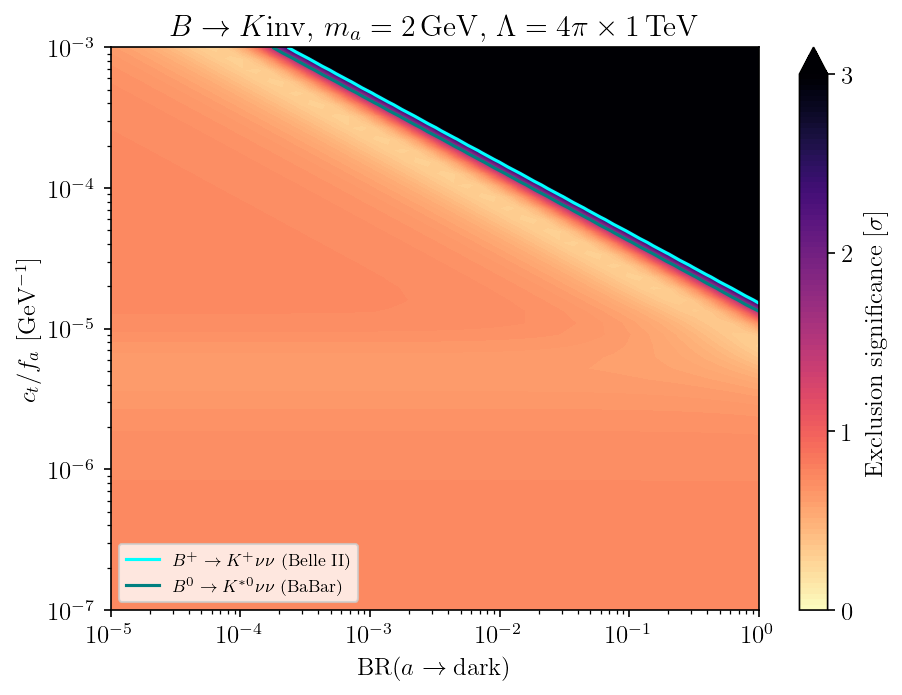

In [16]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_br_dark, y_cuR/fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_br_dark, y_cuR/fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$\mathrm{BR}(a\to \mathrm{dark})$')
plt.ylabel(r'$c_t/f_a$ [GeV$^{-1}$]')
plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $m_a = 2\,\mathrm{GeV}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

In [17]:
from alpaca.constants import mK, mpi0

In [40]:
ma = np.linspace(mK-mpi0, 3.0, 50)
couplings = [ALPcouplings({'cdR': np.matrix([[0, 0, 0], [0, 0, cdR], [0, 0, 0]])}, scale=4*np.pi*1000, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cdR in np.logspace(-8, 0, 50)]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_cdR = np.meshgrid(ma, np.logspace(-8, 0, 50))

In [38]:
chi2 = get_chi2(['B+ -> K+ a', 'B0 -> K*0 a'], x_ma, y_couplings, 1000, br_dark = 0.0, integrator='no_rge')

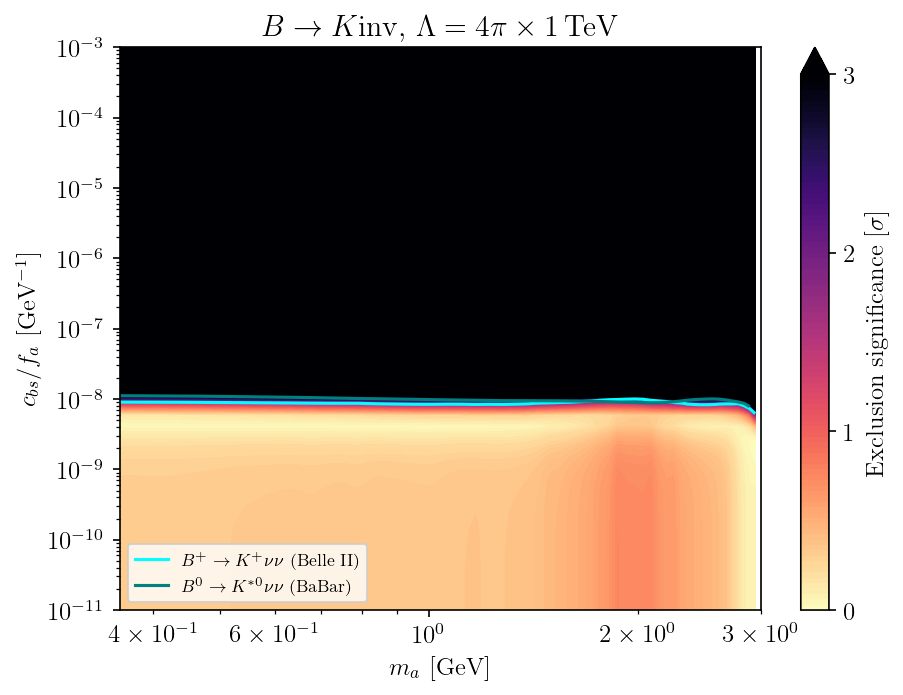

In [41]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, y_cdR/fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, y_cdR/fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_{bs}/f_a$ [GeV$^{-1}$]')
#plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()